<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Perbandingan_Metode_Validasi_Train_Test_Split_vs_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#   Memuat Data & Inisialisasi Model ---
wine = load_wine()
X, y = wine.data, wine.target

In [2]:
# Skala fitur untuk performa model yang lebih baik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)

In [4]:
#   Metode 1: Validasi dengan Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
accuracy_split = model.score(X_test, y_test)

In [5]:
#  Metode 2: Validasi dengan 10-Fold Cross-Validation ---
cv_scores = cross_val_score(model, X_scaled, y, cv=10)

In [6]:
#   Cetak Hasil Perbandingan ---
print("======= Perbandingan Metode Validasi =======")
print(f"Akurasi dengan Train-Test Split: {accuracy_split:.4f} (hasil dari satu kali pengujian)")
print(f"\nAkurasi dari 10-Fold Cross-Validation:\n{np.round(cv_scores, 4)}")
print(f"\nRata-rata Akurasi CV: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f} (estimasi performa yang lebih stabil)")

======= Perbandingan Metode Validasi =======
Akurasi dengan Train-Test Split: 0.9815 (hasil dari satu kali pengujian)

Akurasi dari 10-Fold Cross-Validation:
[0.8889 0.9444 0.8889 0.9444 1.     0.8889 1.     1.     0.8824 1.    ]

Rata-rata Akurasi CV: 0.9438 +/- 0.0505 (estimasi performa yang lebih stabil)


In [17]:
#   Tampilkan 3 Visualisasi ---
plt.figure(figsize=(30, 40))

<Figure size 3000x4000 with 0 Axes>

<Figure size 3000x4000 with 0 Axes>

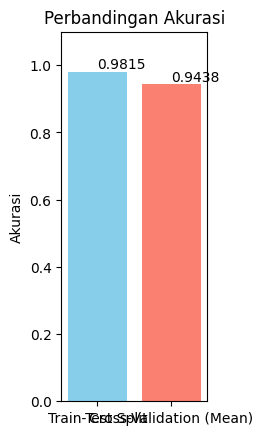

In [18]:
# Visual 1: Bagan Perbandingan Akurasi
plt.subplot(1, 3, 1)
methods = ['Train-Test Split', 'Cross-Validation (Mean)']
accuracies = [accuracy_split, cv_scores.mean()]
bars = plt.bar(methods, accuracies, color=['skyblue', 'salmon'])
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi")
plt.ylim(0, 1.1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom') # Label nilai

([<matplotlib.axis.XTick at 0x7a2bda8da930>], [Text(1, 0, 'SVC Model')])

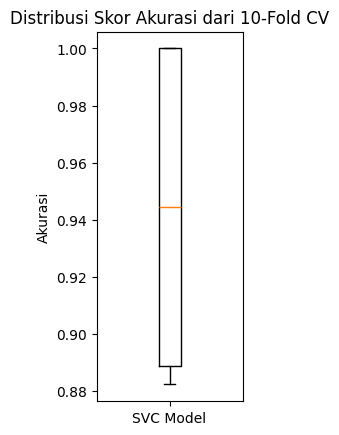

In [19]:
# Visual 2: Distribusi Skor Cross-Validation
plt.subplot(1, 3, 2)
plt.boxplot(cv_scores)
plt.title("Distribusi Skor Akurasi dari 10-Fold CV")
plt.ylabel("Akurasi")
plt.xticks([1], ['SVC Model'])

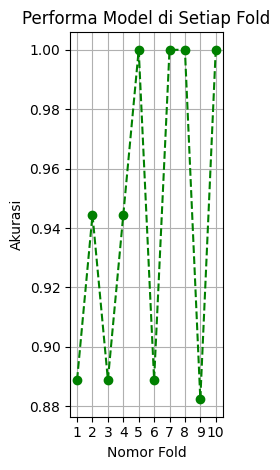

In [20]:
# Visual 3: Plot Skor CV per Fold
plt.subplot(1, 3, 3)
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', color='g')
plt.title("Performa Model di Setiap Fold")
plt.xlabel("Nomor Fold")
plt.ylabel("Akurasi")
plt.xticks(range(1, 11))
plt.grid(True)

plt.tight_layout()
plt.show()